# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Evaluation
Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [243]:
#importing libraries
import pandas as pd
import numpy as np

In [244]:
house_data=pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [245]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [246]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [247]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [248]:
# Calculate the threshold for dropping columns
threshold = len(house_data) * 0.5  # Half of the total number of rows
house_data=house_data.dropna(thresh=threshold,axis=1)

In [249]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [250]:
#Column FireplaceQu has high number of missing values
house_data.drop(columns='FireplaceQu',inplace=True)

In [251]:
#Check value type of remaining columns with missing columns
missing_values_columns=['LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',     
'Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]
# Get the data types for selected columns
data_types_selected = house_data[missing_values_columns].dtypes
data_types_selected

LotFrontage     float64
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

Categorical Values: Missing Values

In [252]:
#Electrical Column
most_frequent_category = house_data['Electrical'].mode()[0]
house_data['Electrical'].fillna(most_frequent_category, inplace=True)


In [253]:
#Replace missing values with "Unknown" Category
house_data['BsmtQual'].fillna('Unknown',inplace=True)

In [254]:
#Replace missing values with "Unknown" Category
house_data['BsmtCond'].fillna('Unknown',inplace=True)

In [255]:
#Replace missing values with "Unknown" Category
house_data['BsmtExposure'].fillna('Unknown',inplace=True)

In [256]:
#Replace missing values with "Unknown" Category
house_data['BsmtFinType1'].fillna('Unknown',inplace=True)

In [257]:
#Replace missing values with "Unknown" Category
house_data['BsmtFinType2'].fillna('Unknown',inplace=True)

In [258]:
#Replace missing values with "Unknown" Category
house_data['GarageType'].fillna('Unknown',inplace=True)

In [259]:
#Replace missing values with "Unknown" Category
house_data['GarageQual'].fillna('Unknown',inplace=True)

In [260]:
#Replace missing values with "Unknown" Category
house_data['GarageFinish'].fillna('Unknown',inplace=True)

In [261]:
#Replace missing values with "Unknown" Category
house_data['GarageCond'].fillna('Unknown',inplace=True)

In [262]:
#Replace missing values with "Unknown" Category
house_data['BsmtExposure'].fillna('Unknown',inplace=True)

Numerical Values with missing values

In [263]:
house_data['LotFrontage'].mean()

70.04995836802665

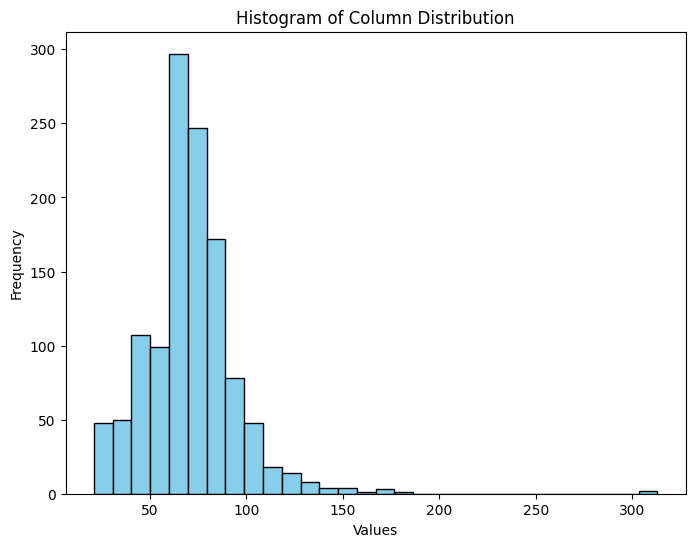

In [264]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(house_data['LotFrontage'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Distribution')
plt.show()


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


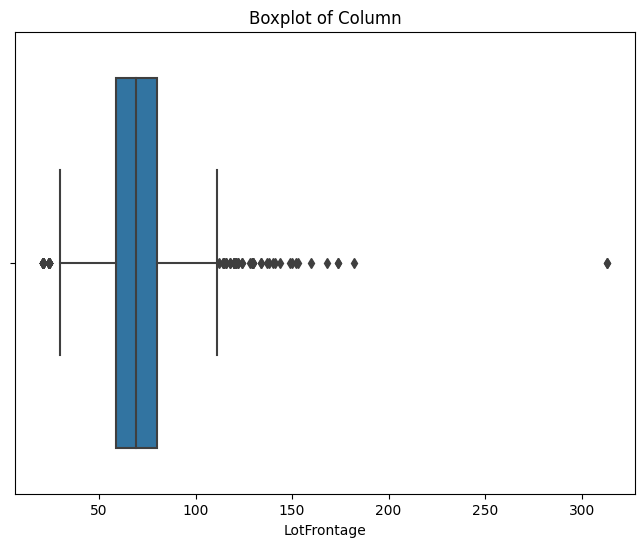

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=house_data['LotFrontage'])
plt.title('Boxplot of Column')
plt.show()


In [266]:
# Calculate the median of the column
median_value =house_data['LotFrontage'].median()

# Fill missing values in the column with the calculated median
house_data['LotFrontage'].fillna(median_value, inplace=True)


In [267]:
house_data['MasVnrArea'].mean()

103.68526170798899

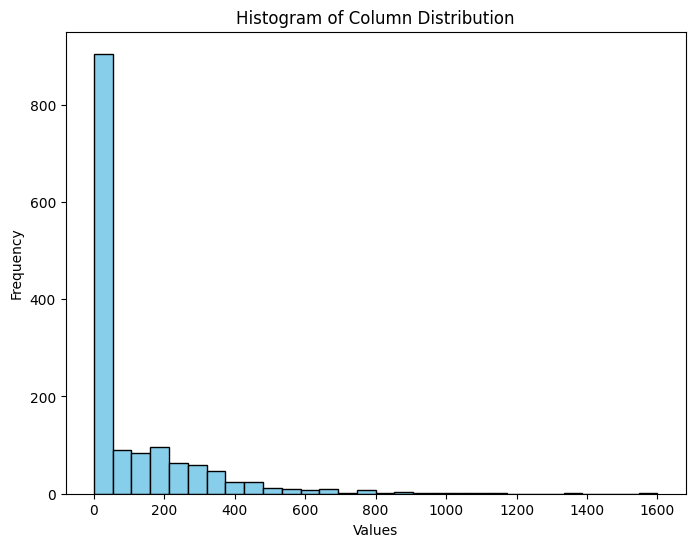

In [268]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(house_data['MasVnrArea'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Distribution')
plt.show()

In [269]:
# Calculate the median of the column
median_value =house_data['MasVnrArea'].median()

# Fill missing values in the column with the calculated median
house_data['MasVnrArea'].fillna(median_value, inplace=True)

In [270]:
house_data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [271]:
#Impute with a Default or Sentinel Value
house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

house_data['GarageYrBlt']=pd.to_datetime(house_data['GarageYrBlt'])
house_data['GarageYrBlt']=house_data['GarageYrBlt'].dt.year




C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3376916444.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1900-01-01 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


In [272]:
house_data['GarageYrBlt']

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
1455    1970
1456    1970
1457    1970
1458    1970
1459    1970
Name: GarageYrBlt, Length: 1460, dtype: int32

In [273]:
# Display columns with missing values and count of missing values in each column
missing_values = house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Series([], dtype: int64)

In [274]:
#features in the dataset
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

Undertaking Feature Engineering

In [275]:
#average price per neighborhood
neighborhood_avg_price = house_data.groupby('Neighborhood')['SalePrice'].mean()
house_data['NeighborhoodAvgPrice'] = house_data['Neighborhood'].map(neighborhood_avg_price)


In [277]:
#Total Square Footage 
house_data['TotalSF'] = house_data['1stFlrSF'] + house_data['2ndFlrSF']


In [278]:
#Age of the house
house_data['HouseAge'] = house_data['YrSold'] - house_data['YearBuilt']


In [279]:
#Total bathrooms
house_data['TotalBath'] = house_data['FullBath'] + 0.5 * house_data['HalfBath']


In [280]:
#Overall Quality and Condition
house_data['OverallQualityCond'] = house_data['OverallQual'] * house_data['OverallCond']


In [281]:
#Age of garage
house_data['GarageAge'] = house_data['YrSold'] - house_data['GarageYrBlt']


In [282]:
#Presence of a Pool and absence of a Fireplace
house_data['HasPool'] = house_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
house_data['HasFireplace'] = house_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [283]:
#ratio of lot frontage to lot area.
house_data['LotRatio'] = house_data['LotFrontage'] / house_data['LotArea']


In [285]:
#total finished square feet of the basement.
house_data['TotalBsmtFinSF'] = house_data['BsmtFinSF1'] + house_data['BsmtFinSF2']


In [286]:
# total square footage of all porches.
house_data['TotalPorchArea'] = house_data['WoodDeckSF'] + house_data['OpenPorchSF'] + house_data['EnclosedPorch'] + house_data['3SsnPorch'] + house_data['ScreenPorch']


In [287]:
#Create a binary feature 'HasPool' indicating the presence of a pool.
house_data['HasPool'] = house_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)


In [289]:
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,TotalSF,HouseAge,TotalBath,OverallQualityCond,GarageAge,HasPool,HasFireplace,LotRatio,TotalBsmtFinSF,TotalPorchArea
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,1710,5,2.5,35,38,0,0,0.007692,706,61
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,1262,31,2.0,48,37,0,1,0.008333,978,298
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,1786,7,2.5,35,38,0,1,0.006044,486,42
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,1717,91,1.0,35,36,0,1,0.006283,216,307
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,2198,8,2.5,40,38,0,1,0.005891,655,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,1647,8,2.5,30,37,0,1,0.007831,0,40
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2073,32,2.0,36,40,0,1,0.006452,953,349
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2340,69,2.0,63,40,0,1,0.007299,275,60
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,1078,60,1.0,30,40,0,0,0.006998,1078,478


In [290]:
house_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Handling Categorical Data

In [291]:
#columns with categorical data
categorical_columns=house_data.select_dtypes(include=['object','category'])
categorical_columns.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [292]:
# Dummy encoding the categorical columns
dummy_variables = pd.get_dummies(categorical_columns, drop_first=True)
# Drop the original categorical columns from the DataFrame
house_data_encoded = house_data.drop(categorical_columns.columns, axis=1)
# Concatenate the dummy-encoded columns with the original DataFrame
house_data_encoded = pd.concat([house_data_encoded, dummy_variables], axis=1)


In [293]:
house_data_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


Numerical Features

In [294]:
# Selecting only the numerical columns
numerical_columns =house_data_encoded.select_dtypes(include=['number']).columns.tolist()
items_to_remove=['YrSold','MoSold','GarageYrBlt','YearBuilt','YearRemodAdd','Id']
# Removing multiple items using list comprehension
numerical_columns = [col for col in numerical_columns if col not in items_to_remove]


# Multiple Linear Regression



In [295]:
house_data_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


m= 1460
n=240

In [296]:
# Get a list of all columns except the specific column
columns_except_specific = [col for col in house_data_encoded.columns if col != 'SalePrice']
# Reorder the columns putting the specific column at the end
ordered_columns = columns_except_specific + ['SalePrice']
# Create a new DataFrame with columns reordered
house = house_data_encoded[ordered_columns]

In [297]:
house

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,True,False,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,True,False,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,True,False,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,False,False,False,False,False,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,True,False,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,True,False,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,True,False,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,True,False,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,True,False,142125


In [399]:
columns_to_remove=['YrSold','GarageYrBlt','PoolArea',
                   'WoodDeckSF','OpenPorchSF','EnclosedPorch',
                   '3SsnPorch','ScreenPorch','BsmtFinSF1',
                   'BsmtFinSF2','LotFrontage','LotArea',
                   'Fireplaces','PoolArea','OverallQual',
                   'OverallCond','FullBath','HalfBath',
                   'YrSold','YearBuilt','1stFlrSF',
                   '2ndFlrSF','Id'
]

Building Machine Learning Model

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [401]:
house_data_cleaned = house.drop(columns=columns_to_remove)
house_data_cleaned

,MSSubClass,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,2003,196.0,150,856,0,1710,1,0,3,...,False,False,False,True,False,False,False,True,False,208500
1,20,1976,0.0,284,1262,0,1262,0,1,3,...,False,False,False,True,False,False,False,True,False,181500
2,60,2002,162.0,434,920,0,1786,1,0,3,...,False,False,False,True,False,False,False,True,False,223500
3,70,1970,0.0,540,756,0,1717,1,0,3,...,False,False,False,True,False,False,False,False,False,140000
4,60,2000,350.0,490,1145,0,2198,1,0,4,...,False,False,False,True,False,False,False,True,False,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,2000,0.0,953,953,0,1647,0,0,3,...,False,False,False,True,False,False,False,True,False,175000
1456,20,1988,119.0,589,1542,0,2073,1,0,3,...,False,False,False,True,False,False,False,True,False,210000
1457,70,2006,0.0,877,1152,0,2340,0,0,4,...,False,False,False,True,False,False,False,True,False,266500
1458,20,1996,0.0,0,1078,0,1078,1,0,2,...,False,False,False,True,False,False,False,True,False,142125


In [402]:
X = house_data_cleaned.iloc[:, :-1]
X

,MSSubClass,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,2003,196.0,150,856,0,1710,1,0,3,...,False,False,False,False,True,False,False,False,True,False
1,20,1976,0.0,284,1262,0,1262,0,1,3,...,False,False,False,False,True,False,False,False,True,False
2,60,2002,162.0,434,920,0,1786,1,0,3,...,False,False,False,False,True,False,False,False,True,False
3,70,1970,0.0,540,756,0,1717,1,0,3,...,False,False,False,False,True,False,False,False,False,False
4,60,2000,350.0,490,1145,0,2198,1,0,4,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,2000,0.0,953,953,0,1647,0,0,3,...,False,False,False,False,True,False,False,False,True,False
1456,20,1988,119.0,589,1542,0,2073,1,0,3,...,False,False,False,False,True,False,False,False,True,False
1457,70,2006,0.0,877,1152,0,2340,0,0,4,...,False,False,False,False,True,False,False,False,True,False
1458,20,1996,0.0,0,1078,0,1078,1,0,2,...,False,False,False,False,True,False,False,False,True,False


In [403]:
y=house['SalePrice']

In [404]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [405]:
X_train

,MSSubClass,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1023,120,2006,14.0,1330,1346,0,1504,0,0,2,...,False,False,False,False,True,False,False,False,True,False
810,20,1999,99.0,0,1040,0,1309,1,0,3,...,False,False,False,False,True,False,False,False,True,False
1384,50,1950,0.0,356,560,0,1258,0,0,2,...,False,False,False,False,True,False,False,False,True,False
626,20,1978,0.0,978,978,0,1422,0,0,3,...,False,False,False,False,True,False,False,False,True,False
813,20,1958,243.0,834,1442,0,1442,0,0,4,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,2006,0.0,1290,1314,0,1314,0,0,3,...,False,False,False,False,True,False,False,False,True,False
1130,50,1950,0.0,500,1122,0,1981,1,0,4,...,False,False,False,False,True,False,False,False,True,False
1294,20,1990,0.0,697,864,0,864,1,0,2,...,False,False,False,False,True,False,False,False,True,False
860,50,1998,0.0,912,912,0,1426,0,0,3,...,False,False,False,False,True,False,False,False,True,False


In [406]:
y_train

1023    191000
810     181000
1384    105000
626     139900
813     157900
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1095, dtype: int64

In [407]:
# Initialize the scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler ONLY on the training data
scaler.fit(X_train)

# Apply the transformation to the test data train data
X_train_scaled=scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [408]:
# Initialize the linear regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train_scaled, y_train)
# Predict on the testing data
y_pred = model.predict(X_test_scaled)
# Evaluate the model (e.g., calculate metrics like R^2 score)
r_squared = model.score(X_test_scaled, y_test)
print("\nR-squared score :", r_squared)
mse=mean_squared_error(y_test,y_pred)
print('\nMean Squared Error:',mse)

c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dt


R-squared score : -2.7175688415684964e+21

Mean Squared Error: 1.903740960619507e+31


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [409]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
scaled_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
vif_data_train = pd.DataFrame()
vif_data_train['Features'] = scaled_train_df.columns
vif_data_train['VIF'] = [variance_inflation_factor(scaled_train_df.values, i) for i in range(scaled_train_df.shape[1])]

c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [410]:
# Remove features with high VIF
high_vif_features = vif_data_train[vif_data_train['VIF'] > 5]['Features']
X_train_selected = X_train.drop(high_vif_features, axis=1)
X_test_selected = X_test.drop(high_vif_features, axis=1)

In [411]:
X_test_selected

,YearRemodAdd,MasVnrArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,MiscVal,MoSold,OverallQualityCond,HasPool,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
892,2003,0.0,0,1,3,1,0,2,48,0,...,False,False,False,False,False,False,False,False,False,True
1105,1995,362.0,1,0,3,1,0,4,40,0,...,False,False,False,False,False,False,False,False,False,True
413,1950,0.0,0,0,2,1,0,3,30,0,...,False,False,False,False,False,False,False,False,False,True
522,1950,0.0,0,0,3,1,0,10,42,0,...,False,False,False,False,False,False,False,False,False,True
1036,2008,70.0,1,0,2,1,0,9,45,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,1976,298.0,0,0,4,1,0,6,36,0,...,False,False,False,False,False,False,False,False,False,True
243,1980,0.0,0,0,3,1,0,4,36,0,...,False,False,False,False,False,False,False,False,False,True
1342,2002,149.0,0,0,3,1,0,8,40,0,...,False,False,False,False,False,False,False,False,False,True
1057,1994,0.0,0,0,3,1,0,1,42,0,...,False,False,False,False,False,False,False,False,False,True


In [412]:
# Initialize the linear regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train_selected, y_train)
# Predict on the testing data
y_pred = model.predict(X_test_selected)
# Evaluate the model (e.g., calculate metrics like R^2 score)
r_squared = model.score(X_test_selected, y_test)
print("\nR-squared score on test data after removing high VIF features:", r_squared)
mse = mean_squared_error(y_test, y_pred)
print('\nMean Squared Error:', mse)


R-squared score on test data after removing high VIF features: 0.6850705046494171

Mean Squared Error: 2206178444.628093


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [414]:
#initilaize unseen data
test_house_data=pd.read_csv('test (1).csv')

In [415]:
test_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [416]:
test_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [417]:
# Display columns with missing values and count of missing values in each column
missing_values = test_house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [418]:
# Calculate the threshold for dropping columns
threshold = len(test_house_data) * 0.5  # Half of the total number of rows
test_house_data=test_house_data.dropna(thresh=threshold,axis=1)

In [419]:
test_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [420]:
# Display columns with missing values and count of missing values in each column
missing_values = test_house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [421]:
missing_values_columns=['LotFrontage','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]
# Get the data types for selected columns
data_types_selected = test_house_data[missing_values_columns].dtypes
data_types_selected

LotFrontage     float64
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [422]:
#LotFrontage
# Calculate the median of the column
median_value =test_house_data['LotFrontage'].median()

# Fill missing values in the column with the calculated median
test_house_data['LotFrontage'].fillna(median_value, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3315890242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['LotFrontage'].fillna(median_value, inplace=True)


In [423]:
test_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [424]:
# Calculate the median of the column
median_value =test_house_data['MasVnrArea'].median()

# Fill missing values in the column with the calculated median
test_house_data['MasVnrArea'].fillna(median_value, inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_12704\2795468113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['MasVnrArea'].fillna(median_value, inplace=True)


In [425]:
#Impute with a Default or Sentinel Value
test_house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
test_house_data['GarageYrBlt']=pd.to_datetime(test_house_data['GarageYrBlt'])
test_house_data['GarageYrBlt']=test_house_data['GarageYrBlt'].dt.year

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1509007508.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1900-01-01 00:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1509007508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageYrBlt'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1509007508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [426]:
test_house_data['BsmtQual'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_12704\2283587604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtQual'].fillna("Unknown",inplace=True,axis=0)


In [427]:
test_house_data['BsmtCond'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1800804869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtCond'].fillna("Unknown",inplace=True,axis=0)


In [428]:
test_house_data['BsmtExposure'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_12704\579793280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtExposure'].fillna("Unknown",inplace=True,axis=0)


In [429]:
test_house_data['BsmtFinType1'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3268587193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtFinType1'].fillna("Unknown",inplace=True,axis=0)


In [430]:
test_house_data['BsmtFinType2'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3323765202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtFinType2'].fillna("Unknown",inplace=True,axis=0)


In [431]:
test_house_data['GarageFinish'].fillna("Unknown",inplace=True,axis=0)


C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1227059960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageFinish'].fillna("Unknown",inplace=True,axis=0)


In [432]:
test_house_data['GarageQual'].fillna("Unknown",inplace=True,axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\2636186448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageQual'].fillna("Unknown",inplace=True,axis=0)


In [433]:
test_house_data['GarageType'].fillna("Unknown",inplace=True,axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\4076784488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageType'].fillna("Unknown",inplace=True,axis=0)


In [434]:
test_house_data['GarageCond'].fillna("Unknown",inplace=True,axis=0)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\2553948615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageCond'].fillna("Unknown",inplace=True,axis=0)


In [435]:
test_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [436]:
# Display columns with missing values and count of missing values in each column
missing_values = test_house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [437]:
test_house_data['SaleType']=test_house_data['SaleType'].fillna(test_house_data['SaleType'].mode()[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\2308839850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['SaleType']=test_house_data['SaleType'].fillna(test_house_data['SaleType'].mode()[0])


In [438]:
mean=test_house_data['GarageArea'].mean()
test_house_data['GarageArea'].fillna(mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1271219881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageArea'].fillna(mean,inplace=True)


In [439]:
mean=test_house_data['GarageCars'].mean()
test_house_data['GarageCars'].fillna(mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\4060204502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['GarageCars'].fillna(mean,inplace=True)


In [440]:
test_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [441]:
test_house_data['Functional']=test_house_data['Functional'].fillna(test_house_data['Functional'].mode()[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3587392000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['Functional']=test_house_data['Functional'].fillna(test_house_data['Functional'].mode()[0])


In [442]:
test_house_data['KitchenQual']=test_house_data['KitchenQual'].fillna(test_house_data['KitchenQual'].mode()[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3628472203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['KitchenQual']=test_house_data['KitchenQual'].fillna(test_house_data['KitchenQual'].mode()[0])


In [443]:
mean=test_house_data['BsmtHalfBath'].mean()
test_house_data['BsmtHalfBath'].fillna(mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\834229808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtHalfBath'].fillna(mean,inplace=True)


In [444]:
mean=test_house_data['BsmtFullBath'].mean()
test_house_data['BsmtFullBath'].fillna(mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1443075095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtFullBath'].fillna(mean,inplace=True)


In [445]:
mean=test_house_data['TotalBsmtSF'].mean()
test_house_data['TotalBsmtSF'].fillna(mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\594451726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['TotalBsmtSF'].fillna(mean,inplace=True)


In [446]:
mean=test_house_data['BsmtUnfSF'].mean()
test_house_data['BsmtUnfSF'].fillna(mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\981271949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtUnfSF'].fillna(mean,inplace=True)


In [447]:
mean=test_house_data['BsmtFinSF2'].mean()
test_house_data['BsmtFinSF2'].fillna(mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\697964616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtFinSF2'].fillna(mean,inplace=True)


In [448]:
mean=test_house_data['BsmtFinSF1'].mean()
test_house_data['BsmtFinSF1'].fillna(mean,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\2002210712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['BsmtFinSF1'].fillna(mean,inplace=True)


In [449]:
test_house_data['Exterior2nd']=test_house_data['Exterior2nd'].fillna(test_house_data['Exterior2nd'].mode()[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\2855363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['Exterior2nd']=test_house_data['Exterior2nd'].fillna(test_house_data['Exterior2nd'].mode()[0])


In [450]:
test_house_data['Exterior1st']=test_house_data['Exterior1st'].fillna(test_house_data['Exterior1st'].mode()[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3989117103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['Exterior1st']=test_house_data['Exterior1st'].fillna(test_house_data['Exterior1st'].mode()[0])


In [451]:
test_house_data['MSZoning']=test_house_data['MSZoning'].fillna(test_house_data['MSZoning'].mode()[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3506595085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['MSZoning']=test_house_data['MSZoning'].fillna(test_house_data['MSZoning'].mode()[0])


In [452]:
test_house_data['Utilities']=test_house_data['Utilities'].fillna(test_house_data['Utilities'].mode()[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_12704\3117541132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['Utilities']=test_house_data['Utilities'].fillna(test_house_data['Utilities'].mode()[0])


In [453]:
test_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [454]:
# Display columns with missing values and count of missing values in each column
missing_values = test_house_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Series([], dtype: int64)

In [455]:
test_house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [457]:
#Total Square Footage 
test_house_data['TotalSF'] = test_house_data['1stFlrSF'] + test_house_data['2ndFlrSF']
#Age of the house
test_house_data['HouseAge'] = test_house_data['YrSold'] - test_house_data['YearBuilt']
#Total bathrooms
test_house_data['TotalBath'] = test_house_data['FullBath'] + 0.5 * test_house_data['HalfBath']
#Overall Quality and Condition
test_house_data['OverallQualityCond'] = test_house_data['OverallQual'] * test_house_data['OverallCond']
#Age of garage
test_house_data['GarageAge'] = test_house_data['YrSold'] - test_house_data['GarageYrBlt']
#Presence of a Pool and absence of a Fireplace
test_house_data['HasPool'] = test_house_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_house_data['HasFireplace'] = test_house_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
#ratio of lot frontage to lot area.
test_house_data['LotRatio'] = test_house_data['LotFrontage'] / test_house_data['LotArea']
#total finished square feet of the basement.
test_house_data['TotalBsmtFinSF'] = test_house_data['BsmtFinSF1'] + test_house_data['BsmtFinSF2']
# total square footage of all porches.
test_house_data['TotalPorchArea'] = test_house_data['WoodDeckSF'] + test_house_data['OpenPorchSF'] + test_house_data['EnclosedPorch'] + test_house_data['3SsnPorch'] + test_house_data['ScreenPorch']
#Create a binary feature 'HasPool' indicating the presence of a pool.
test_house_data['HasPool'] = test_house_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)









C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1972308405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['TotalSF'] = test_house_data['1stFlrSF'] + test_house_data['2ndFlrSF']
C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1972308405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_house_data['HouseAge'] = test_house_data['YrSold'] - test_house_data['YearBuilt']
C:\Users\hp\AppData\Local\Temp\ipykernel_12704\1972308405.py:6: SettingWithCopyWarning: 
A value is trying to be set o

In [458]:
#columns with categorical data
categorical_columns=test_house_data.select_dtypes(include=['object','category'])
categorical_columns.T

,0,1,2,3,4,5,6,7,8,9,...,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
MSZoning,RH,RL,RL,RL,RL,RL,RL,RL,RL,RL,...,RM,RM,RL,RM,RM,RM,RM,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,IR1,IR1,IR1,IR1,IR1,IR1,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,Corner,Inside,Inside,Inside,Corner,Inside,Inside,Inside,Corner,...,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Mod,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Mod
Neighborhood,NAmes,NAmes,Gilbert,Gilbert,StoneBr,Gilbert,Gilbert,Gilbert,Gilbert,NAmes,...,MeadowV,MeadowV,Mitchel,MeadowV,MeadowV,MeadowV,MeadowV,Mitchel,Mitchel,Mitchel
Condition1,Feedr,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


In [463]:
test_house_data = test_house_data.drop(columns=columns_to_remove)

In [464]:
# Dummy encoding the categorical columns
dummy_variables = pd.get_dummies(categorical_columns, drop_first=True)
# Drop the original categorical columns from the DataFrame
test_data_encoded = test_house_data.drop(categorical_columns.columns, axis=1)
# Concatenate the dummy-encoded columns with the original DataFrame
test_data_encoded = pd.concat([test_data_encoded, dummy_variables], axis=1)


In [465]:
missing_columns=set(X.columns)-set(test_data_encoded.columns)
for col in missing_columns:
    test_data_encoded[col] = 0

In [466]:
##Reorder Columns to match order of columns
test_data_encoded=test_data_encoded[X.columns]

In [467]:
test_data_encoded

,MSSubClass,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,1961,0.0,270.0,882.0,0,896,0.0,0.0,2,...,False,False,False,False,True,False,False,False,True,False
1,20,1958,108.0,406.0,1329.0,0,1329,0.0,0.0,3,...,False,False,False,False,True,False,False,False,True,False
2,60,1998,0.0,137.0,928.0,0,1629,0.0,0.0,3,...,False,False,False,False,True,False,False,False,True,False
3,60,1998,20.0,324.0,926.0,0,1604,0.0,0.0,3,...,False,False,False,False,True,False,False,False,True,False
4,120,1992,0.0,1017.0,1280.0,0,1280,0.0,0.0,2,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1970,0.0,546.0,546.0,0,1092,0.0,0.0,3,...,False,False,False,False,True,False,False,False,True,False
1455,160,1970,0.0,294.0,546.0,0,1092,0.0,0.0,3,...,False,False,False,False,True,False,False,False,False,False
1456,20,1996,0.0,0.0,1224.0,0,1224,1.0,0.0,4,...,False,False,False,False,True,False,False,False,False,False
1457,85,1992,0.0,575.0,912.0,0,970,0.0,1.0,3,...,False,False,False,False,True,False,False,False,True,False


In [468]:
# Remove features with high VIF
unseen_data_selected = test_data_encoded.drop(high_vif_features, axis=1)

In [469]:
unseen_data_selected

,YearRemodAdd,MasVnrArea,BsmtFullBath,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,MiscVal,MoSold,OverallQualityCond,HasPool,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,1961,0.0,0.0,0.0,2,1,0,6,30,0,...,False,False,False,False,False,False,False,False,False,True
1,1958,108.0,0.0,0.0,3,1,12500,6,36,0,...,False,False,False,False,False,False,False,False,False,True
2,1998,0.0,0.0,0.0,3,1,0,3,25,0,...,False,False,False,False,False,False,False,False,False,True
3,1998,20.0,0.0,0.0,3,1,0,6,36,0,...,False,False,False,False,False,False,False,False,False,True
4,1992,0.0,0.0,0.0,2,1,0,1,40,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1970,0.0,0.0,0.0,3,1,0,6,28,0,...,False,False,False,False,False,False,False,False,False,True
1455,1970,0.0,0.0,0.0,3,1,0,4,20,0,...,False,False,False,False,False,False,False,False,False,False
1456,1996,0.0,1.0,0.0,4,1,0,9,35,0,...,False,False,False,False,False,False,False,False,False,False
1457,1992,0.0,0.0,1.0,3,1,700,7,25,0,...,False,False,False,False,False,False,False,False,False,True


In [470]:
predictions = model.predict(unseen_data_selected)

c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [471]:
len(predictions)

1459

In [472]:
mapped_predictions = pd.DataFrame({'ID':unseen_data_selected.iloc[:, 0], 'SalePrice': predictions})

# Display the mapped predictions DataFrame
print(mapped_predictions)


        ID      SalePrice
0     1961   89355.608288
1     1958   78546.398429
2     1998  188982.626439
3     1998  234066.591592
4     1992  176737.140428
...    ...            ...
1454  1970  106472.988563
1455  1970  115126.500908
1456  1996  235808.370006
1457  1992  105282.174687
1458  1994  223054.380402

[1459 rows x 2 columns]


In [473]:
# Assuming 'mapped_predictions' is the DataFrame containing ID and SalesPrice columns
# Save the DataFrame to a CSV file
mapped_predictions.to_csv('mapped_predictions.csv', index=False)
